[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/1st_DNN.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


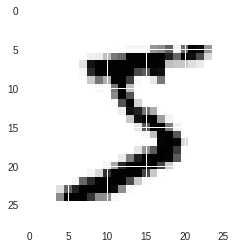

In [40]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [44]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [47]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [80]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 13))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 13, 13, 10)        330       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 1, 1, 10)          16910     
_________________________________________________________________
flatten_9 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 17,560
Trainable params: 17,560
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [83]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.2655 - acc: 0.9221
Epoch 2/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.1017 - acc: 0.9698
Epoch 3/10
 9984/60000 [===>..........................] - ETA: 13s - loss: 0.0794 - acc: 0.9773

60000/60000 [==============================] - 16s 263us/step - loss: 0.0711 - acc: 0.9790
Epoch 4/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0565 - acc: 0.9825
Epoch 5/10
18304/60000 [========>.....................] - ETA: 10s - loss: 0.0447 - acc: 0.9868

60000/60000 [==============================] - 16s 261us/step - loss: 0.0476 - acc: 0.9854
Epoch 6/10
60000/60000 [==============================] - 16s 263us/step - loss: 0.0411 - acc: 0.9875
Epoch 7/10
19872/60000 [========>.....................] - ETA: 10s - loss: 0.0305 - acc: 0.9901

60000/60000 [==============================] - 16s 263us/step - loss: 0.0359 - acc: 0.9884
Epoch 8/10
60000/60000 [==============================] - 15s 256us/step - loss: 0.0323 - acc: 0.9896
Epoch 9/10
22272/60000 [==========>...................] - ETA: 9s - loss: 0.0255 - acc: 0.9927

60000/60000 [==============================] - 16s 261us/step - loss: 0.0267 - acc: 0.9917
Epoch 10/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.0244 - acc: 0.9923


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [85]:
print(score)

[0.05259809641534812, 0.9843]


In [0]:
y_pred = model.predict(X_test)

In [57]:
print(y_pred[:9])
print(y_test[:9])

[[1.69043352e-25 3.20677302e-28 3.43399534e-19 6.21086710e-17
  2.07919622e-26 1.02642674e-25 0.00000000e+00 1.00000000e+00
  4.10198411e-18 4.55154875e-17]
 [2.91179686e-17 9.24858690e-10 1.00000000e+00 3.87857445e-17
  2.34194699e-30 4.85999712e-18 1.53791882e-10 5.27931675e-35
  4.53146770e-14 1.14616300e-25]
 [1.93503463e-10 9.99997020e-01 4.99785502e-09 1.47657142e-13
  2.87573516e-06 1.32843514e-14 1.14760501e-11 8.52419113e-09
  8.86990037e-08 2.07466956e-15]
 [1.00000000e+00 1.53473804e-23 2.81490213e-11 4.48111122e-21
  3.97520995e-22 5.39368133e-19 1.96511915e-14 3.33512362e-15
  3.33082120e-18 1.49457177e-16]
 [4.82798796e-20 3.48412804e-24 2.56344306e-18 4.25294515e-17
  1.00000000e+00 1.06468212e-21 8.68335675e-21 1.36691615e-15
  3.29071046e-14 1.84144301e-12]
 [2.91341150e-14 9.99993920e-01 1.45945972e-12 1.33662265e-14
  1.68647656e-08 7.84513861e-19 1.17894559e-16 6.00702197e-06
  1.25330697e-08 1.68194536e-14]
 [1.26503924e-24 3.87471615e-17 6.32339829e-13 3.48314813e

In [58]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7fa5534640f0>, 'conv2d_8': <keras.layers.convolutional.Conv2D object at 0x7fa553515898>, 'conv2d_9': <keras.layers.convolutional.Conv2D object at 0x7fa5555a0048>, 'flatten_3': <keras.layers.core.Flatten object at 0x7fa553464748>, 'activation_3': <keras.layers.core.Activation object at 0x7fa54fa3b2b0>}


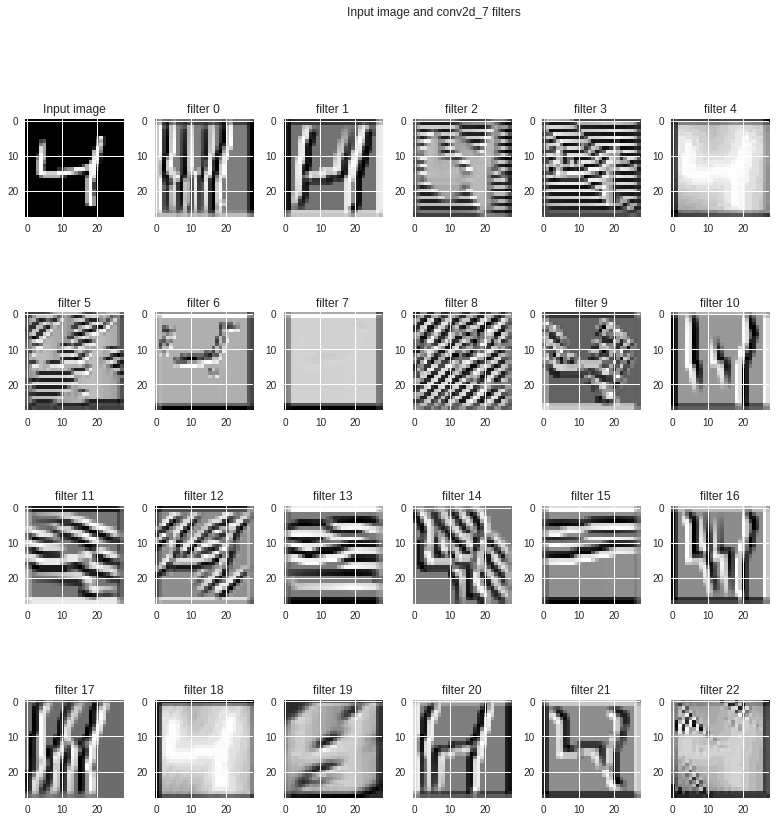

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()